In [36]:
max_features = 20000
text_max_words = 200

In [37]:
from keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [38]:
#print(x_train)

In [39]:
x_val = x_train[max_features:]
y_val = y_train[max_features:]
x_train = x_train[:max_features]
y_train = y_train[:max_features]

In [40]:
from keras.preprocessing import sequence
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

In [41]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Embedding(max_features, 128, input_length=text_max_words))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [42]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 128, input_length=text_max_words))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [43]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 39s 2ms/step - loss: 0.0028 - acc: 0.9997 - val_loss: 0.5688 - val_acc: 0.8518
Epoch 2/25
20000/20000 [==============================] - 39s 2ms/step - loss: 1.9274e-04 - acc: 1.0000 - val_loss: 0.5945 - val_acc: 0.8528
Epoch 3/25
20000/20000 [==============================] - 41s 2ms/step - loss: 9.8013e-05 - acc: 1.0000 - val_loss: 0.6131 - val_acc: 0.8532
Epoch 4/25
20000/20000 [==============================] - 46s 2ms/step - loss: 6.4505e-05 - acc: 1.0000 - val_loss: 0.6260 - val_acc: 0.8544
Epoch 5/25
20000/20000 [==============================] - 48s 2ms/step - loss: 4.5739e-05 - acc: 1.0000 - val_loss: 0.6387 - val_acc: 0.8552
Epoch 6/25
20000/20000 [==============================] - 48s 2ms/step - loss: 3.4022e-05 - acc: 1.0000 - val_loss: 0.6512 - val_acc: 0.8548
Epoch 7/25
20000/20000 [==============================] - 46s 2ms/step - loss: 2.5868e-05 - acc: 1.0000 - val

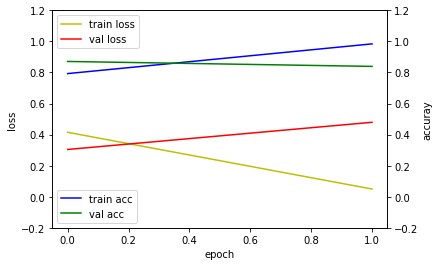

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])
acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [53]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

25000/25000 [==============================] - 4s 168us/step
## evaluation loss and_metrics ##
[0.4782695237827301, 0.836560000038147]
